# Congressional Record and Hansard Word Cloud Analysis


This notebook contains the code to create a selection of different word clouds from the Congressional Record and Hansard datasets. Word clouds are used to get a basic understanding of their most frequently used stems.


## Setup


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

plt.style.use('ggplot')


# Word cloud function for the Congressional Record and Hansard datasets
def get_sorted_tfidf_scores(stems):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(stems)
    tfidf_scores = X.sum(axis=0).A1
    tfidf_scores_and_stems = zip(
        vectorizer.get_feature_names_out(), tfidf_scores)
    sorted_scores = sorted(tfidf_scores_and_stems,
                           key=lambda x: x[1], reverse=True)
    return sorted_scores

## Complete corpus word clouds


In [4]:
congressional_record = pd.read_csv(
    DATA_PATH + 'non_procedural_congressional_record.csv')
hansard = pd.read_csv(DATA_PATH + 'non_procedural_hansard.csv')

### Calculating the Congressional Record and Hansard TF-IDF scores


In [5]:
congressional_record_stems = congressional_record['cleaned_stems']
hansard_stems = hansard['cleaned_stems']

congressional_record_tfidf_scores = get_sorted_tfidf_scores(
    congressional_record_stems)
hansard_tfidf_scores = get_sorted_tfidf_scores(
    hansard_stems)

### Visualising the Congressional Record and Hansard TF-IDF score word clouds


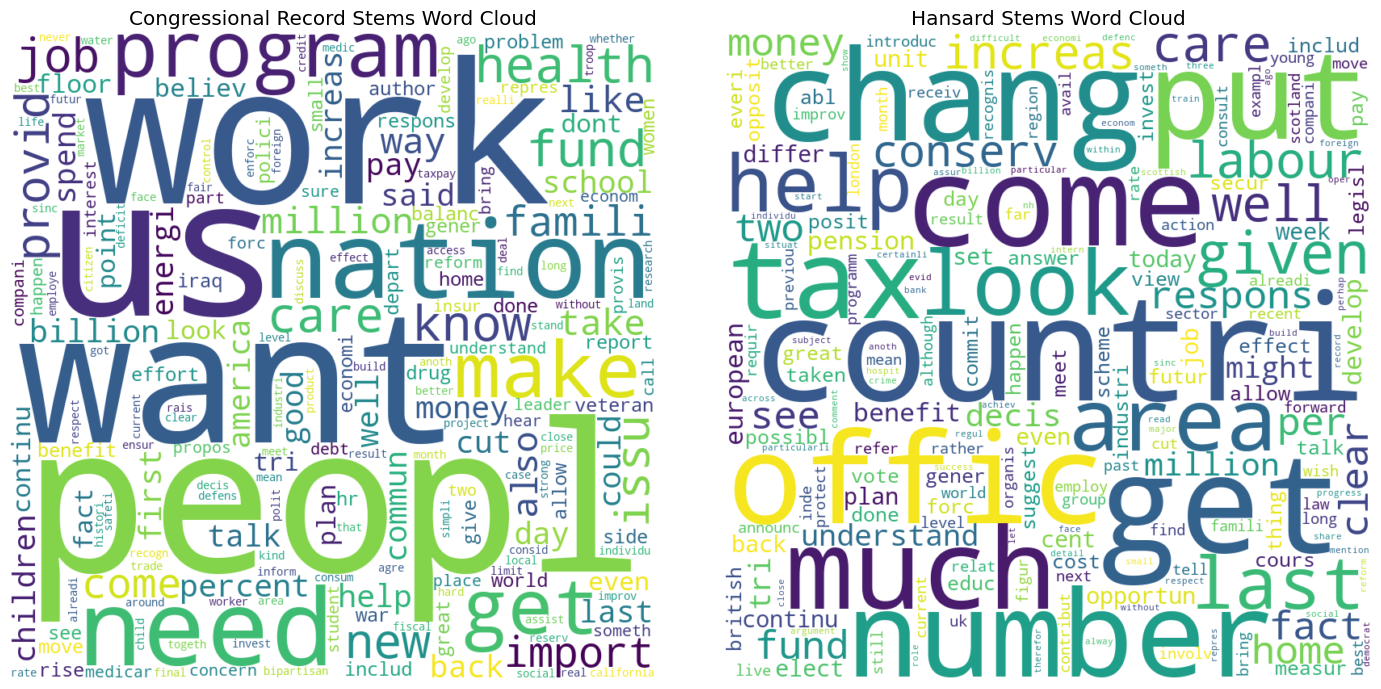

In [8]:
congressional_record_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(congressional_record_tfidf_scores))
hansard_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(hansard_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(congressional_record_word_cloud,
           interpolation='bilinear')
plt.title('Congressional Record Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hansard_word_cloud, interpolation='bilinear')
plt.title('Hansard Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

## Climate word clouds


In [8]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Calculating the Climate Congressional Record and Climate Hansard TF-IDF scores


In [9]:
climate_congressional_record_stems = climate_congressional_record['cleaned_stems']
climate_hansard_stems = climate_hansard['cleaned_stems']

climate_congressional_record_tfidf_scores = get_sorted_tfidf_scores(
    climate_congressional_record_stems)
climate_hansard_tfidf_scores = get_sorted_tfidf_scores(climate_hansard_stems)

### Visualising the Climate Congressional Record and Climate Hansard TF-IDF score word clouds


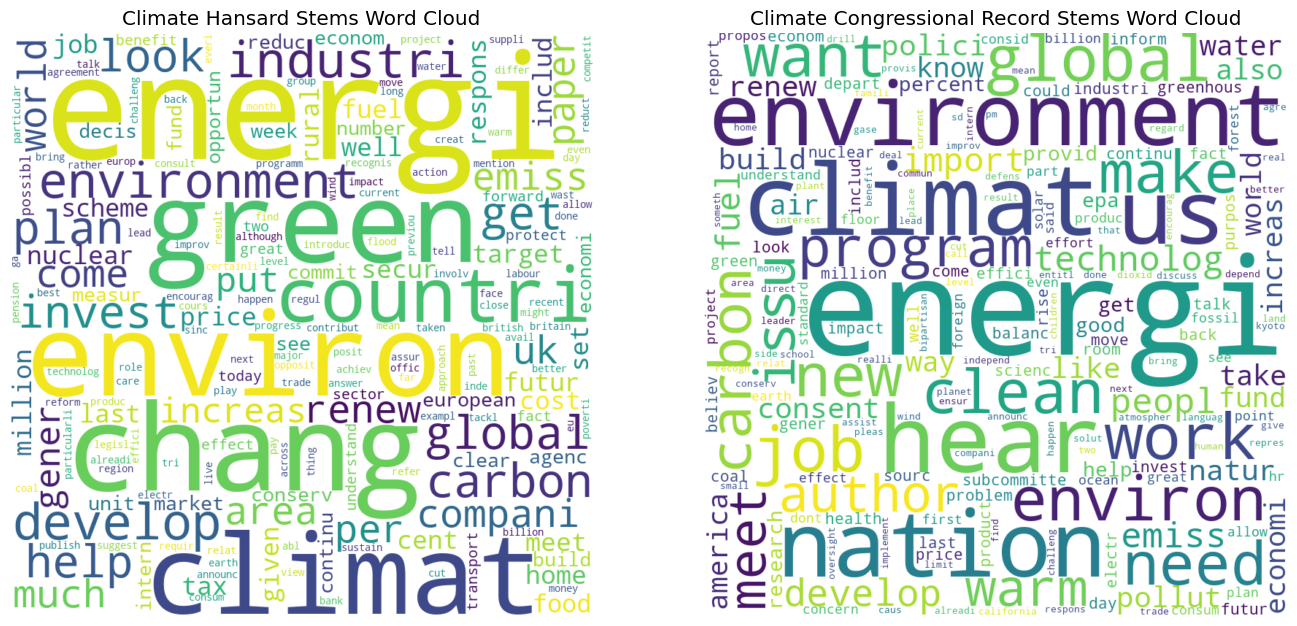

In [15]:
climate_hansard_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_hansard_tfidf_scores))

climate_congressional_record_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_congressional_record_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(climate_hansard_word_cloud, interpolation='bilinear')
plt.title('Climate Hansard Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(climate_congressional_record_word_cloud, interpolation='bilinear')
plt.title('Climate Congressional Record Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=8)
plt.show()